In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df1=pd.read_csv('takehome_user_engagement.csv')
df2=pd.read_csv('takehome_users.csv')

In [3]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df1.shape

(207917, 3)

In [5]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
df2.shape

(12000, 10)

In [7]:
df1.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [8]:
df1.time_stamp=pd.to_datetime(df1.time_stamp)

In [9]:
df1['Date']=df1.time_stamp.dt.date

In [10]:
df1.head()

,time_stamp,user_id,visited,Date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [11]:
df1.visited.value_counts()

1    207917
Name: visited, dtype: int64

In [12]:
df1.time_stamp.min()

Timestamp('2012-05-31 08:20:06')

In [13]:
df1.user_id.count()

207917

In [14]:
df1a=df1.sort_values(['user_id', 'Date']).drop_duplicates()

In [15]:
df1a.head()

,time_stamp,user_id,visited,Date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [16]:
day0 = datetime.date(2012, 5, 31)
df1a['Day']=df1a.Date-day0
df1a['Day']=pd.to_numeric(df1a.Day)/86400000000000
df1a['Day']=df1a['Day'].astype(int)

In [17]:
df1a.head()

,time_stamp,user_id,visited,Date,Day
0,2014-04-22 03:53:30,1,1,2014-04-22,691
1,2013-11-15 03:45:04,2,1,2013-11-15,533
2,2013-11-29 03:45:04,2,1,2013-11-29,547
3,2013-12-09 03:45:04,2,1,2013-12-09,557
4,2013-12-25 03:45:04,2,1,2013-12-25,573


In [18]:
a=df1a.groupby('user_id').rolling(3)
b=a.max()-a.min()

In [19]:
b.head(15)

user_id  visited   Day
user_id                           
1       0       NaN      NaN   NaN
2       1       NaN      NaN   NaN
        2       NaN      NaN   NaN
        3       0.0      0.0  24.0
        4       0.0      0.0  26.0
        5       0.0      0.0  22.0
        6       0.0      0.0  14.0
        7       0.0      0.0  34.0
        8       0.0      0.0  31.0
        9       0.0      0.0   6.0
        10      0.0      0.0   5.0
        11      0.0      0.0   7.0
        12      0.0      0.0  24.0
        13      0.0      0.0  25.0
        14      0.0      0.0  22.0

In [20]:
c=b[b.Day<8]
c=c[['Day']]
c.head()

Day
user_id        
2       9   6.0
        10  5.0
        11  7.0
10      24  7.0
        27  5.0

In [21]:
d= c.unstack(level=1)
d.index
adopted_id=d.index

In [22]:
df2['Adopted']=True
df2['Adopted'][df2.object_id.isin(adopted_id)]=False

<ipython-input-22-d2b467d4528e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Adopted'][df2.object_id.isin(adopted_id)]=False


In [23]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,True


In [24]:
df2.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
Adopted                          0
dtype: int64

In [25]:
df2.rename(columns={'object_id':'user_id'}, inplace=True)
df2

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,True
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,True
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,True
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,True
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,True


In [26]:
df2.creation_time=pd.to_datetime(df2.creation_time)
df2.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [27]:
df2.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [28]:
# Too many variables and will not use it
df2.org_id.nunique()

417

In [29]:
# Too many variables and will not use it
df2.invited_by_user_id.nunique()

2564

In [30]:
df2.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [31]:
df2[['opted_in_to_mailing_list','enabled_for_marketing_drip']]=df2[['opted_in_to_mailing_list','enabled_for_marketing_drip']].astype(str)

In [32]:
df2.creation_time=pd.to_numeric(df2.creation_time)/1e+09

In [33]:
df2.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,1.398139e+09,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,True
1,2,1.384487e+09,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,1.363735e+09,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,True
3,4,1.369124e+09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,True
4,5,1.358418e+09,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,True


In [34]:
df2.dtypes

user_id                         int64
creation_time                 float64
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list       object
enabled_for_marketing_drip     object
org_id                          int64
invited_by_user_id            float64
Adopted                          bool
dtype: object

In [35]:
df2a=df2[['creation_time', 'creation_source', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip','Adopted']]
df2a=pd.get_dummies(df2a)

In [36]:
df2a.shape

(12000, 12)

In [37]:
X=df2a[['creation_time', 'last_session_creation_time', 'creation_source_GUEST_INVITE','creation_source_ORG_INVITE','creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP','creation_source_SIGNUP_GOOGLE_AUTH','opted_in_to_mailing_list_0', 'opted_in_to_mailing_list_1', 'enabled_for_marketing_drip_0', 'enabled_for_marketing_drip_1']]
y=df2a.Adopted

In [38]:
df2a.isnull().sum()

creation_time                            0
last_session_creation_time            3177
Adopted                                  0
creation_source_GUEST_INVITE             0
creation_source_ORG_INVITE               0
creation_source_PERSONAL_PROJECTS        0
creation_source_SIGNUP                   0
creation_source_SIGNUP_GOOGLE_AUTH       0
opted_in_to_mailing_list_0               0
opted_in_to_mailing_list_1               0
enabled_for_marketing_drip_0             0
enabled_for_marketing_drip_1             0
dtype: int64

In [39]:
df2a.dropna(inplace=True)
df2a.isnull().sum()
X=df2a[['creation_time', 'last_session_creation_time', 'creation_source_GUEST_INVITE','creation_source_ORG_INVITE','creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP','creation_source_SIGNUP_GOOGLE_AUTH','opted_in_to_mailing_list_0', 'opted_in_to_mailing_list_1', 'enabled_for_marketing_drip_0', 'enabled_for_marketing_drip_1']]
y=df2a.Adopted

In [40]:
X.head()

,creation_time,last_session_creation_time,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1
0,1.398139e+09,1.398139e+09,1,0,0,0,0,0,1,1,0
1,1.384487e+09,1.396238e+09,0,1,0,0,0,1,0,1,0
2,1.363735e+09,1.363735e+09,0,1,0,0,0,1,0,1,0
3,1.369124e+09,1.369210e+09,1,0,0,0,0,1,0,1,0
4,1.358418e+09,1.358850e+09,1,0,0,0,0,1,0,1,0


In [41]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled =scaler.transform(X)

In [42]:
X_scaled

array([[ 1.28488425,  0.96566576,  2.13448948, ...,  1.72151441,
         0.42335582, -0.42335582],
       [ 0.55329248,  0.86831293, -0.4684961 , ..., -0.5808839 ,
         0.42335582, -0.42335582],
       [-0.55881375, -0.79592272, -0.4684961 , ..., -0.5808839 ,
         0.42335582, -0.42335582],
       ...,
       [ 1.30974486,  0.9894192 ,  2.13448948, ...,  1.72151441,
        -2.36207924,  2.36207924],
       [-1.91300218, -2.08095415, -0.4684961 , ..., -0.5808839 ,
         0.42335582, -0.42335582],
       [ 0.88766734,  0.586139  , -0.4684961 , ..., -0.5808839 ,
        -2.36207924,  2.36207924]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25, random_state=25)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

In [46]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.811
Accuracy score (validation): 0.817

Learning rate:  0.1
Accuracy score (training): 0.828
Accuracy score (validation): 0.832

Learning rate:  0.25
Accuracy score (training): 0.930
Accuracy score (validation): 0.927

Learning rate:  0.5
Accuracy score (training): 0.942
Accuracy score (validation): 0.937

Learning rate:  0.75
Accuracy score (training): 0.941
Accuracy score (validation): 0.936

Learning rate:  1
Accuracy score (training): 0.940
Accuracy score (validation): 0.940



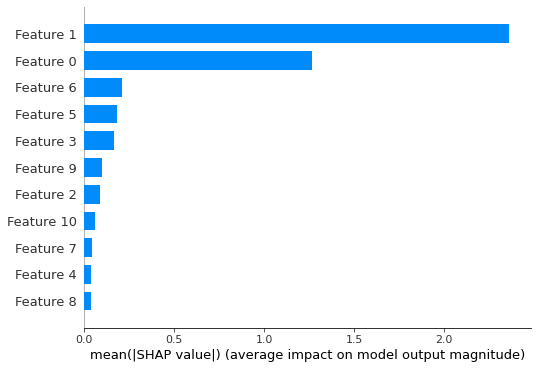

In [47]:
import shap
shap_values = shap.TreeExplainer(gb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [48]:
y_pred = gb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 303,  100],
       [  32, 1771]], dtype=int64)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import f1_score
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.956
Random Forest: f1-score=0.956


11


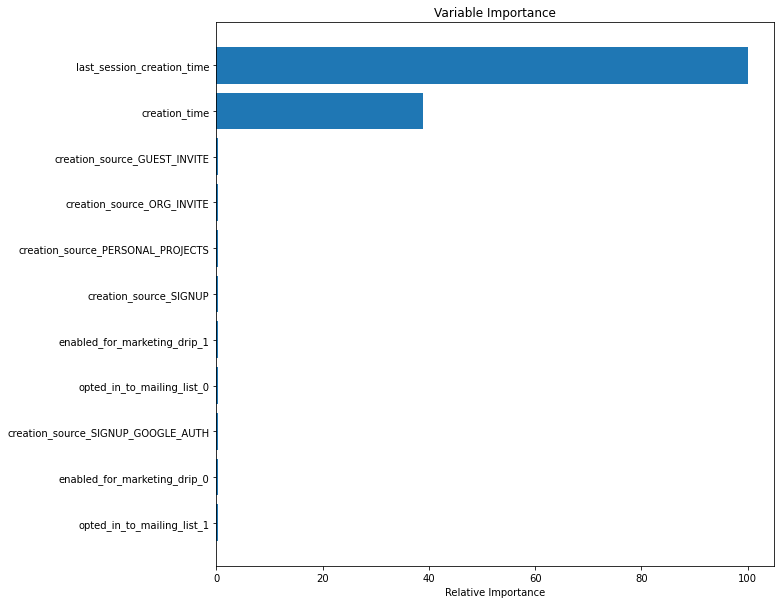

In [50]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [51]:
confusion_matrix(y_test, y_pred)

array([[ 338,   65],
       [  31, 1772]], dtype=int64)